In [ ]:
import sys
sys.path.append('/mnt/nas05/data01/francesco/progetto_simone/ionosphere')

from src.data.dataset import get_ionosphere_rae_dataloaders, get_sequence_data_objects

# Load data
train_loader, val_loader, train_dataset, val_dataset = get_ionosphere_rae_dataloaders(
    data_path='/mnt/nas05/data01/francesco/sdo_img2img/sde_mag2mag_v2/progetto_simone/data/pickled_maps',
    csv_path='/mnt/nas05/data01/francesco/sdo_img2img/sde_mag2mag_v2/npy_metrics.csv',
    batch_size=4,
    num_workers=0,
    normalization='minmax',
    triplicate_channels=True,
    cartesian_transform=True,
    output_size=224,
)

# Get one batch
input_batch, target_batch = next(iter(train_loader))
print(f"Input shape: {input_batch.shape}")
print(f"Target shape: {target_batch.shape}")

/mnt/nas05/data01/francesco/progetto_simone/ionosphere/src/vit.py:26: FutureWarning: xformers.components is deprecated and is not maintained anymore. It might be removed in a future version of xFormers 
  import xformers.components.attention.core as xfa


IonoRAEDataset [train]: 175436 samples
  Normalization: minmax
  Cartesian transform: True
  Input shape: (3, 224, 224)
  Target shape: (1, 224, 224)
IonoRAEDataset [valid]: 43859 samples
  Normalization: minmax
  Cartesian transform: True
  Input shape: (3, 224, 224)
  Target shape: (1, 224, 224)


/home2/francesco/.conda/envs/sdo_project/lib/python3.10/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Input shape: torch.Size([4, 3, 224, 224])
Target shape: torch.Size([4, 1, 224, 224])


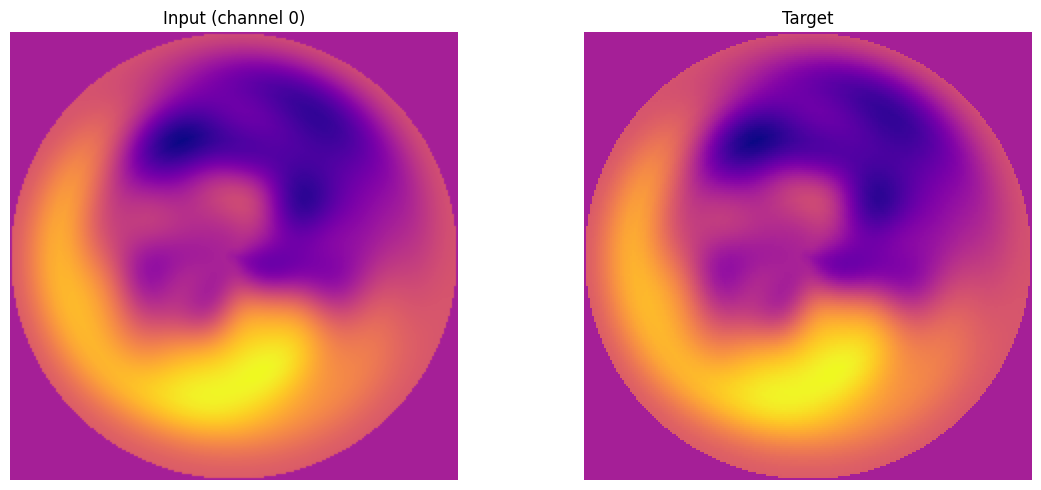

In [2]:
import matplotlib.pyplot as plt

# Visualize first sample
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Input (show first channel)
axes[0].imshow(input_batch[0, 0].cpu().numpy(), cmap='plasma')
axes[0].set_title('Input (channel 0)')
axes[0].axis('off')

# Target
axes[1].imshow(target_batch[0, 0].cpu().numpy(), cmap='plasma')
axes[1].set_title('Target')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [3]:
input_batch[0, 0].shape

torch.Size([224, 224])

In [18]:
import sys
sys.path.append('/mnt/nas05/data01/francesco/progetto_simone/ionosphere')

from src.data.dataset import get_ionosphere_rae_dataloaders, get_sequence_data_objects

# Use Cartesian grid transformation (224x224)
dataset, sampler, dataloader = get_sequence_data_objects(
    batch_size=1,
    distributed=False,
    num_data_workers=4,
    sequence_length=5,
    csv_path="/mnt/nas05/data01/francesco/sdo_img2img/sde_mag2mag_v2/progetto_simone/data/l1_earth_associated_with_maps.csv",
    cartesian_transform=True,  # Enable Cartesian transform
    output_size=224,  # Output size
    split="train",
    normalization_type='absolute_max',  # Use per-file normalization!
    per_file_stats_path='/mnt/nas05/data01/francesco/progetto_simone/global_normalization_stats.json',
    use_l1_conditions=True
)

Loaded global stats: mean=-1385.47, std=9372.14


In [19]:
# Get one batch
it = iter(dataloader)


In [20]:
input_batch = next(it)


In [4]:
for i in range(50):
    input_batch = next(it)
    print((input_batch[0].min(), input_batch[0].max()))  # Check min and max values

(tensor(-0.2040), tensor(0.0808))
(tensor(-0.1886), tensor(0.1849))
(tensor(-0.1118), tensor(0.0322))
(tensor(-0.2465), tensor(0.1979))
(tensor(-0.1324), tensor(0.0518))
(tensor(-0.1251), tensor(0.0729))
(tensor(-0.1873), tensor(0.1691))
(tensor(-0.2339), tensor(0.1483))
(tensor(-0.1695), tensor(0.2153))
(tensor(-0.1407), tensor(0.4992))
(tensor(-0.4081), tensor(0.5427))
(tensor(-0.2389), tensor(0.1490))
(tensor(-0.1112), tensor(0.2225))
(tensor(-0.1893), tensor(0.3945))
(tensor(-0.1244), tensor(0.3074))
(tensor(-0.2002), tensor(0.0443))
(tensor(-0.1243), tensor(0.2965))
(tensor(-0.2344), tensor(0.4942))
(tensor(-0.1765), tensor(0.1161))
(tensor(-0.2490), tensor(0.2233))
(tensor(-0.1641), tensor(0.1277))
(tensor(-0.1636), tensor(0.6779))
(tensor(-0.1410), tensor(0.0708))
(tensor(-0.1187), tensor(0.0814))


KeyboardInterrupt: 

In [24]:
input_batch = next(it)


In [25]:
original_data = dataset.reverse_data_normalization(input_batch[0])

In [9]:
original_data.shape

torch.Size([1, 5, 1, 224, 224])

TypeError: Invalid shape (224,) for image data

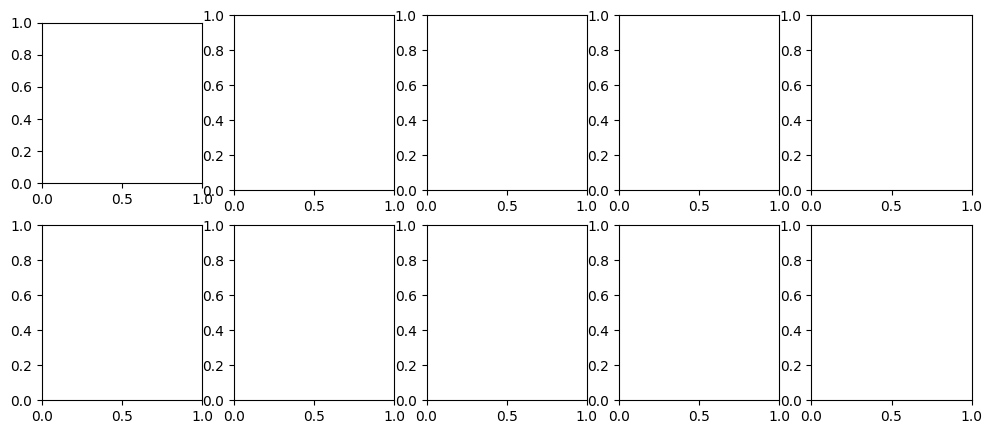

In [34]:
import matplotlib.pyplot as plt

# Visualize first sample
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

# Input (show first channel)
for i in range(5):
    axes[0, i].imshow(input_batch[0][0, i, 0].cpu().numpy(), cmap='plasma')
    axes[0, i].set_title(f'Min: {input_batch[0][0, i, 0].min():.2f}, Max: {input_batch[0][0, i, 0].max():.2f}')
    axes[0, i].axis('off')

    axes[1, i].imshow(original_data[0, i, 0].cpu().numpy(), cmap='plasma')
    axes[1, i].set_title(f'Min: {original_data[0, i, 0].min():.2f}, Max: {original_data[0, i, 0].max():.2f}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [27]:
# Super fast iteration
from tqdm import tqdm

all_mins = []
all_maxs = []

for input_batch, cond_batch in tqdm(dataloader, desc="Processing batches"):
    all_mins.append(input_batch.min().item())
    all_maxs.append(input_batch.max().item())

print(f"Global min: {min(all_mins)}")
print(f"Global max: {max(all_maxs)}")

Processing batches: 100%|██████████| 9709/9709 [43:51<00:00,  3.69it/s]

Global min: -1.0
Global max: 1.0


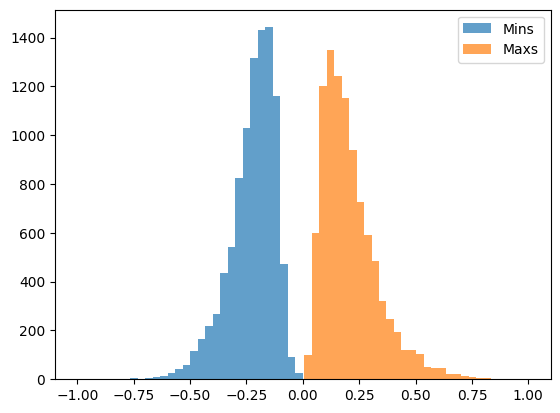

In [29]:
plt.hist(all_mins, bins=30, alpha=0.7, label='Mins')
plt.hist(all_maxs, bins=30, alpha=0.7, label='Maxs')
plt.legend()
plt.show()


In [33]:
import numpy as np
print(f"Mean min: {np.mean(all_mins)}, Mean max: {np.mean(all_maxs)}")

Mean min: -0.2244183342677089, Mean max: 0.209743104814464
